Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [21]:
NAME = "Clyde Correa"

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 1 - Using QUANDL

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account. 
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account. 

**NOTE**: You can remove this key before submitting the assignment.

In [22]:
# all imports and env variables
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web

# This line of code should work on Windows and Mac
%env QUANDL_API_KEY = "4y6kDbtFxREkRHuSwox_"

# If the above line of code does not work on your system,
# You can use this way of setting Quandl env variable
#import quandl
#quandl.ApiConfig.api_key = "4y6kDbtFxREkRHuSwox_"

env: QUANDL_API_KEY="4y6kDbtFxREkRHuSwox_"


In [23]:
# Make sure you adjust the start and end date accordingly
# so that the start date = today date

start = datetime.datetime(2015, 7, 20)
end = datetime.datetime(2020, 7, 20)

#amzn = web.DataReader('WIKI/AMZN', 'quandl', start, end)

### Option 2 - Using Yahoo Finance `yfinance` library

In [24]:
import yfinance as yf
from pandas_datareader import data as pdr

# 1) Using pandas datareader and Yahoo Finance
yf.pdr_override()

amzn = pdr.get_data_yahoo('AMZN', start = start)

[*********************100%***********************]  1 of 1 completed


In [25]:
# 2) Using fix_yahoo_finance library only to download AMZN data

amzn = yf.download('AMZN', start=start)

[*********************100%***********************]  1 of 1 completed


In [26]:
# If we want to download multipe stocks into a single dataframe:

all_stocks_list = ['AMZN', 'FB','MMM', 'IBM' ]
all_stocks = yf.download(all_stocks_list, start = start)

[*********************100%***********************]  4 of 4 completed


# Question 1-3

In [27]:
all_stocks.head() #print first 5 rows of dataset

Adj Close                                          Close  \
                  AMZN         FB         IBM         MMM        AMZN   
Date                                                                    
2015-07-20  488.100006  97.910004  139.373947  136.410553  488.100006   
2015-07-21  488.000000  98.389999  131.207199  135.229858  488.000000   
2015-07-22  488.269989  97.040001  129.018646  134.925980  488.269989   
2015-07-23  482.179993  95.440002  130.128998  129.794952  482.179993   
2015-07-24  529.419983  96.949997  128.535904  129.647354  529.419983   

                                                     High             ...  \
                   FB         IBM         MMM        AMZN         FB  ...   
Date                                                                  ...   
2015-07-20  97.910004  173.220001  157.119995  493.200012  98.599998  ...   
2015-07-21  98.389999  163.070007  155.759995  488.880005  99.239998  ...   
2015-07-22  97.040001  160.350006  155.410004  492.500000  97.580002  ...   
2015-07-23  95.440002  161.729996  149.500000  491.660004  97.449997  ...   
2015-07-24  96.949997  159.750000  149.330002  580.570007  97.760002  ...   

                   Low                    Open                         \
                   IBM         MMM        AMZN         FB         IBM   
Date                                                                    
2015-07-20  172.139999  156.270004  492.570007  95.849998  172.789993   
2015-07-21  162.020004  155.339996  487.899994  98.949997  164.339996   
2015-07-22  159.699997  154.440002  485.989990  96.739998  162.729996   
2015-07-23  159.830002  149.020004  491.660004  96.959999  160.270004   
2015-07-24  159.410004  148.699997  578.989990  97.349998  161.289993   

                          Volume                               
                   MMM      AMZN        FB       IBM      MMM  
Date                                                           
2015-07-20  156.770004   4752500  54860500   7377800  2349000  
2015-07-21  156.750000   3181800  39453300  13752300  2743900  
2015-07-22  155.589996   3114900  28299500   7181800  3067700  
2015-07-23  151.919998   9374400  29418800   5034200  5176400  
2015-07-24  148.860001  21909400  33444900   3778200  3433600  

[5 rows x 24 columns]

In [28]:
all_stocks.isnull().sum()/all_stocks.shape[0] #no null values

Adj Close  AMZN    0.0
           FB      0.0
           IBM     0.0
           MMM     0.0
Close      AMZN    0.0
           FB      0.0
           IBM     0.0
           MMM     0.0
High       AMZN    0.0
           FB      0.0
           IBM     0.0
           MMM     0.0
Low        AMZN    0.0
           FB      0.0
           IBM     0.0
           MMM     0.0
Open       AMZN    0.0
           FB      0.0
           IBM     0.0
           MMM     0.0
Volume     AMZN    0.0
           FB      0.0
           IBM     0.0
           MMM     0.0
dtype: float64

In [29]:
adj = all_stocks[[('Adj Close', 'AMZN'),('Adj Close', 'MMM'),('Adj Close', 'FB'),\
                  ('Adj Close', 'IBM')]] #dataframe of adjusted close prices
#gets dates which coincide with the end of the business month
month_index = pd.date_range(start, end, freq='BM')
#create dataframe with rows coinciding with the dates from month_index
adj_month = adj.loc[month_index]
adj_month.loc[adj_month[('Adj Close', 'AMZN')].isnull()] #finds row with null value

C:\Users\clyde\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


Adj Close            
                AMZN MMM  FB IBM
2018-03-30       NaN NaN NaN NaN

Looking it up online, this date corresponds to Good Friday meaning that the stock market was closed. So we will replace the data with the previous days information since the stock market is closed on Saturdays.

In [30]:
'''replace missing data with the previous day's data'''
adj_month.replace(adj_month.loc[adj_month[('Adj Close', 'AMZN')].isnull()], \
                  all_stocks.loc['2018-03-29'], inplace=True)

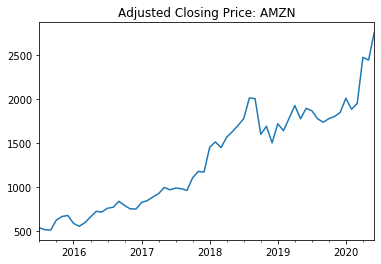

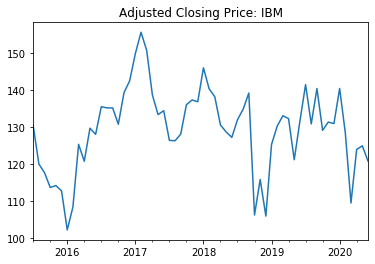

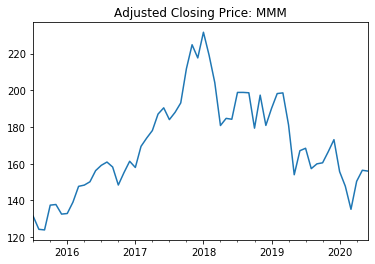

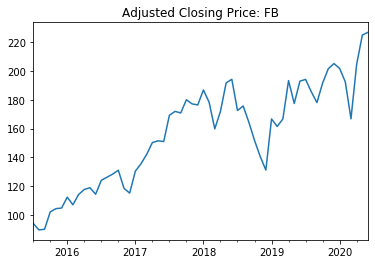

In [32]:
import matplotlib.pyplot as plt #plotting library
%matplotlib inline
stocks = ['AMZN', 'IBM', 'MMM','FB'] #create a list with stock names
for item in stocks:
    plt.figure() #creates plot
    '''Examine adjusted close price for each stock to look for any appearent trends or seasonality'''
    adj_month[('Adj Close', item)].plot(title="Adjusted Closing Price: %s" %item, label=item)

# Question 4

In [33]:
'''Create function that builds autocorrelation plot for the adjusted close prices for each stock'''
def autocorr(df, stock):
    plt.figure() #create plot
    aWNTimePlot = pd.plotting.autocorrelation_plot(df) #ACF plot
    #display title for each plot depending on stock name
    aWNTimePlot.set_title("An Autocorrelation Graph for %s's stock" %stock)
    aWNTimePlot.set_ylabel("Correlation") #y axis name
    aWNTimePlot.set_xlabel("Lag (Hours)") #x axis name
    plt.show() #display plot

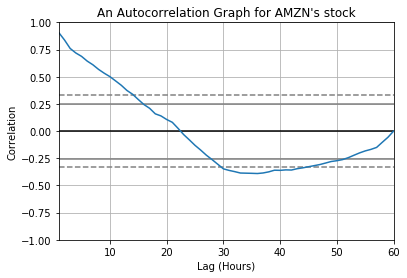

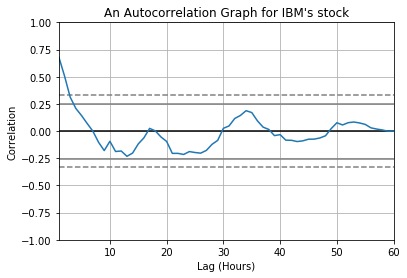

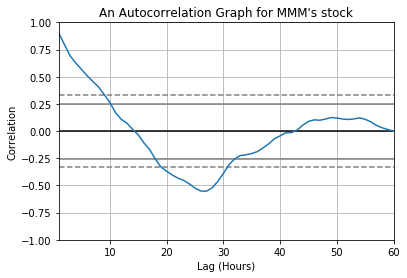

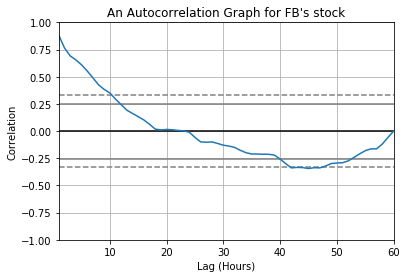

In [34]:
'''Use above function to display autocorrelation for each plot'''
for stock in stocks:
    autocorr(adj_month[('Adj Close', stock)],stock) 

From the autocorrelation plots we can see trends in Facebook's and Amazon's stock prices. We know this because we can see decreasing positive values for the correlation as the lag increases. IBM's stock prices seem to be a random process (white noise), given that most points (+95%) fall within the confidence interval. MMM's stock price shows seasonality. We can observe large autocorrelations between seasonal lags compared to the others.

In [35]:
'''ACF of monthly returns using statsmodels ACF plot (provides visualization with spikes)'''
from statsmodels.graphics.tsaplots import plot_acf
#for stock in stocks:
    #plot_acf(adj_month[('Adj Close', stock)])
    #plt.show()

# Question 5

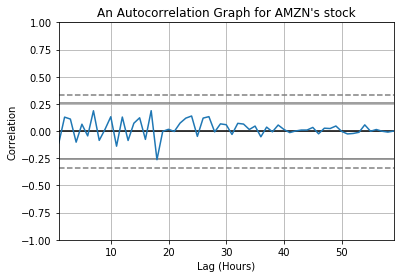

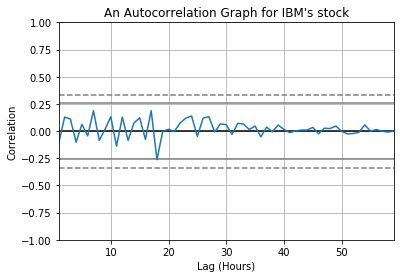

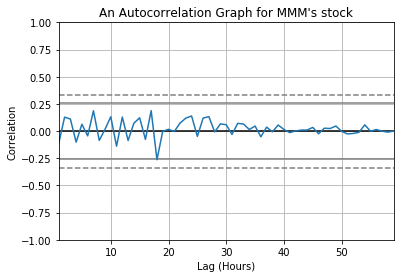

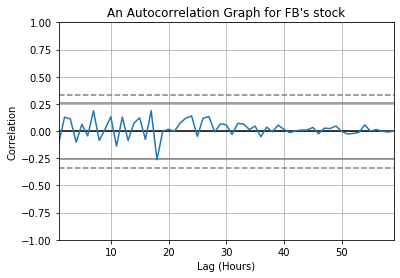

In [36]:
returns = (adj_month-adj_month.shift(1)) #Adds time offset, shift returns data w/o changing index
returns = returns[1:] #first column contains null value since no returns on start date
for stock in stocks:
    autocorr(returns, stock)

After shifting the dataset each of the plots show a white noise series. The corrected data now has no linear relationship with the other data from previous lags. From the notes, we know that if 95% of the data falls between +/-(2/root(T)), where T is the length of the lag period (T=59 in this case), then we have stationarity within each dataset.

In [37]:
'''ACF of corrected monthly returns using statsmodels ACF plot (provides visualization with spikes)'''
#for stock in stocks:
    #plot_acf(returns[('Adj Close','AMZN')])
    #plt.show()

'ACF of corrected monthly returns using statsmodels ACF plot (provides visualization with spikes)'

# Question 6

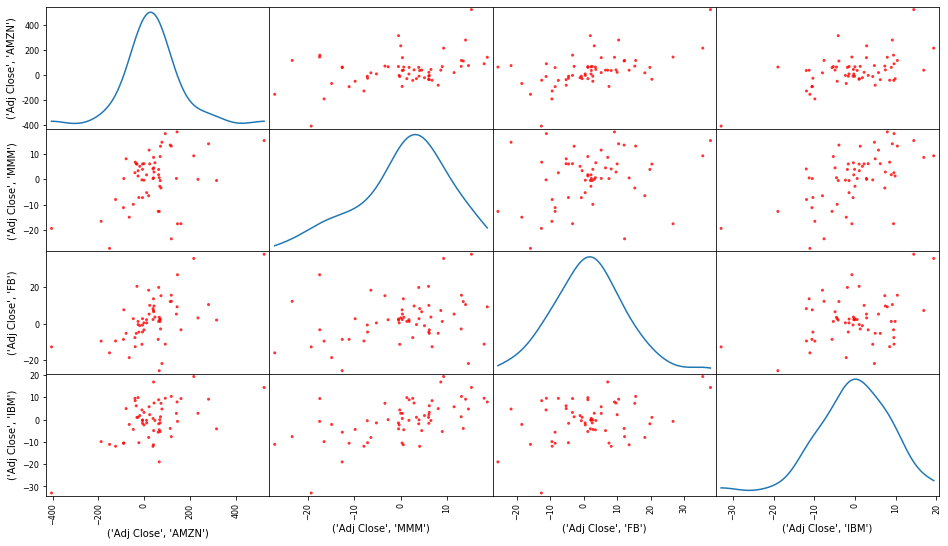

In [38]:
'''create scatter plot to determine correlation between stocks'''
scatter = pd.plotting.scatter_matrix(returns, alpha=0.8,figsize=(16,9), color='r', diagonal='kde')

In [39]:
'''Shows correlation between each stock'''
#import seaborn as sns
#returns.corr().round(2)

'Shows correlation between each stock'

There seems to be a weak positive correlation the following pairs of company stocks:

- **IBM and AMZN**
- **FB and AMZN**
- **IBM and MMM**

The plot for "FB vs. AMZN" shows increasing variance as we see a cluster of points around the origin. **MMM vs. AMZN** has a very weak linear relationship. The other stocks show no appearent linear relation using the scatter plot. 